In [89]:
from os import listdir
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import layers
from keras.models import Sequential
from livelossplot import PlotLossesKeras

In [90]:
images_dir = 'data/train_data'
file_names = listdir(images_dir)
sample_count = len(file_names)
print(sample_count)

800


In [91]:
images_test_dir = 'data/real_data'
file_test_names = listdir(images_test_dir)
test_count = len(file_test_names)
print(test_count)

10


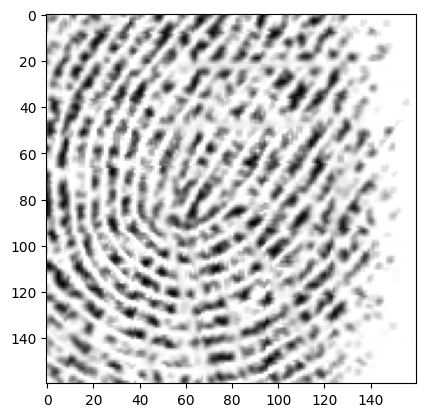

In [92]:
first_image = cv2.imread(images_dir + '/' + file_names[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(first_image, cmap='gray')
height, width = first_image.shape
plt.show()

In [93]:
depth = 1
X = np.zeros((sample_count, width, height, depth))
y = np.zeros((sample_count, 1), dtype=int)
for index, file_name in enumerate(file_names):
    full_path = images_dir + '/' + file_name
    file_label_text, file_number_and_ext = file_name.split('_')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X[index] = np.reshape(image, (width, height, depth))
    y[index] = label

In [94]:
X_test = np.zeros((test_count, width, height, depth))
for index, file_name in enumerate(file_test_names):
    full_path = images_test_dir + '/' + file_name
    file_label_text, file_ext = file_name.split('.')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X_test[index] = np.reshape(image, (width, height, depth))

In [95]:
y_one_hot = np.zeros((sample_count, 10))
for index, label in enumerate(y):
    y_one_hot[index, label] = 1

In [96]:
classifier = Sequential([
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(height, width, depth)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(256),
    layers.Dense(10, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 158, 158, 16)      160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 79, 79, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 64)      

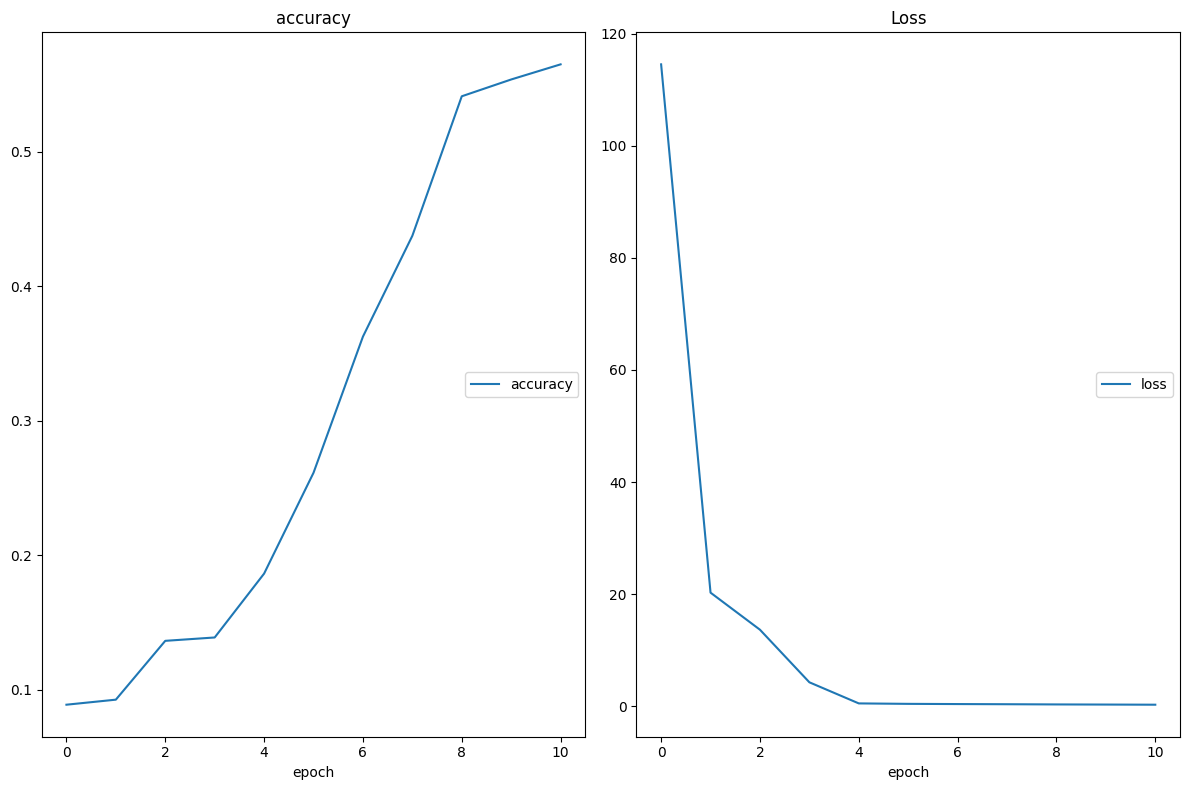

accuracy
	accuracy         	 (min:    0.089, max:    0.565, cur:    0.565)
Loss
	loss             	 (min:    0.309, max:  114.509, cur:    0.309)
7/7 [==============================] - 4s 574ms/step - loss: 0.3086 - accuracy: 0.5650
CPU times: user 5min 37s, sys: 34.7 s, total: 6min 12s
Wall time: 46 s


In [97]:
%%time
classifier.fit(X, y_one_hot, verbose=1, batch_size=128, epochs=11, callbacks=[PlotLossesKeras()])

In [98]:
y_test = classifier.predict(X_test)
print(y_test)

1/1 [==============================] - 0s 52ms/step
[[0.44461823 0.44563136 0.4315222  0.45538178 0.4630578  0.46952903
  0.4465435  0.4456741  0.46213585 0.44770357]
 [0.44461823 0.44563136 0.4315222  0.45538178 0.4630578  0.46952903
  0.4465435  0.4456741  0.46213585 0.44770357]
 [0.42984638 0.44519147 0.4243168  0.4451546  0.45879555 0.4467992
  0.43619624 0.43512663 0.44382197 0.43610033]
 [0.44537285 0.4433224  0.4261073  0.45205766 0.46870458 0.4612571
  0.44476378 0.44932216 0.45906916 0.44258425]
 [0.44461823 0.44563136 0.4315222  0.45538178 0.4630578  0.46952903
  0.4465435  0.4456741  0.46213585 0.44770357]
 [0.44461823 0.44563136 0.4315222  0.45538178 0.4630578  0.46952903
  0.4465435  0.4456741  0.46213585 0.44770357]
 [0.37473628 0.46307635 0.38052204 0.38966748 0.40622646 0.4249985
  0.43348667 0.40251744 0.44083473 0.41272482]
 [0.3294033  0.39373952 0.35467198 0.39813167 0.41705438 0.41497365
  0.4008065  0.39984313 0.4042192  0.36109886]
 [0.45591834 0.43594646 0.43207

/tmp/ipykernel_6925/2624928916.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


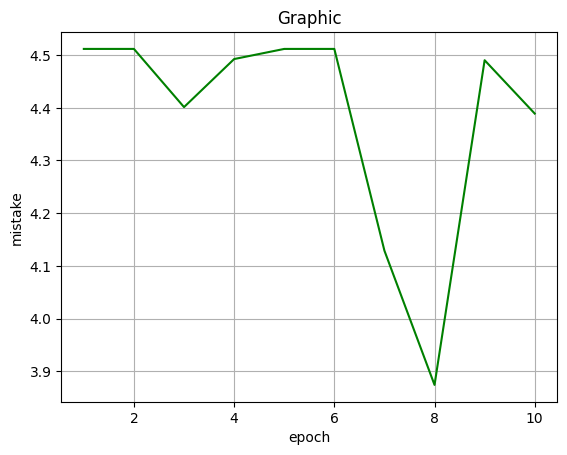

In [99]:
mat = np.matrix(y_test)
sums = mat.sum(axis=1)

fig, ax = plt.subplots()
ax.plot(np.arange(1, len(sums) + 1), sums, color='g')
ax.set_xlabel('epoch')
ax.set_ylabel('mistake')
ax.set_title('Graphic')
ax.grid(True)
fig.show()